# MAZ Diplomarbeit - Biodiversität in der Schweiz#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("01_source/tabula_ch/tabula_fische_rundmaeuler.csv")

In [3]:
df.head()

,Scientific name,Deutscher Name,Criteria,CAT,VBGF,Bemerkungen
0,Abramis bjoerkna,Blicke,"B1,B1a,B2,B2a",NT,4,Artenkenntnisse? Wird oft übersehen
1,Abramis brama,Brachsen,NaN,LC,NG,NaN
2,Acipenser naccarii,Mittelmeer-Stör,NaN,RE,0/E,NaN
3,Acipenser sturio,Stör,NaN,RE,0/E,NaN
4,Alburnoides bipunctatus,Schneider,A2c,VU,3/E,Gefährdung wegen Habitatdefiziten (Fliessstrec...


In [4]:
len (df)

54

In [5]:
df.pop("Criteria")

0                                         B1,B1a,B2,B2a
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   A2c
5                                                   NaN
6              A2b,B1,B1a,B1bi,B1bii,B1biv,B2,B2a,B2bi,
7                                      B1,B1a,B2,B2a,D2
8                                                   NaN
9                                                   NaN
10                                                  NaN
11                                                  NaN
12                                                  NaN
13                                            A2b,B1,B2
14                                    A2b,B1,B1a,B2,B2a
15                    A2b,B1,B1bi,B1ciii,B2,B2bi,B2ciii
16             A2c,B1,B1a,B1bi,B1bii,B1biv,B1ci,B2,B2a,
17          A2c,B1,B1a,B1bi,B1ci,B2,B2a,B2bi,B2c

In [6]:
df.pop("VBGF")

0       4
1      NG
2     0/E
3     0/E
4     3/E
5      NG
6     2/E
7     3/E
8     0/E
9     0/E
10      3
11     NG
12      4
13    3/E
14    3/E
15    1/E
16    1/E
17    1/E
18    3/E
19    4/E
20      4
21      3
22     NG
23      4
24     NG
25     NG
26    0/E
27    0/E
28    2/E
29    4/E
30     NG
31     NG
32    3/E
33    3/E
34     NG
35    1/E
36    2/E
37     NG
38     NG
39    2/E
40    3/E
41    3/E
42     NG
43    4/E
44    0/E
45      4
46      2
47      1
48      0
49      3
50     NG
51    4/E
52    3/E
53     NG
Name: VBGF, dtype: object

In [7]:
df.head(2)

,Scientific name,Deutscher Name,CAT,Bemerkungen
0,Abramis bjoerkna,Blicke,NT,Artenkenntnisse? Wird oft übersehen
1,Abramis brama,Brachsen,LC,NaN


In [8]:
df.rename(columns={"Scientific name":"sc name","Deutscher Name":"dt name","CAT":"cat", "Bemerkungen":"bemerkungen"},inplace=True)

In [9]:
df["cat"].value_counts()

LC     14
VU     12
RE      8
NT      6
CR      5
EN      4
NT      3
EN      1
VU      1
Name: cat, dtype: int64

In [10]:
df.head(1)

,sc name,dt name,cat,bemerkungen
0,Abramis bjoerkna,Blicke,NT,Artenkenntnisse? Wird oft übersehen


In [11]:
df['einteilung'] = 'Fische'

In [12]:
df.head(1)

,sc name,dt name,cat,bemerkungen,einteilung
0,Abramis bjoerkna,Blicke,NT,Artenkenntnisse? Wird oft übersehen,Fische


In [13]:
df["cat"].value_counts()

LC     14
VU     12
RE      8
NT      6
CR      5
EN      4
NT      3
EN      1
VU      1
Name: cat, dtype: int64

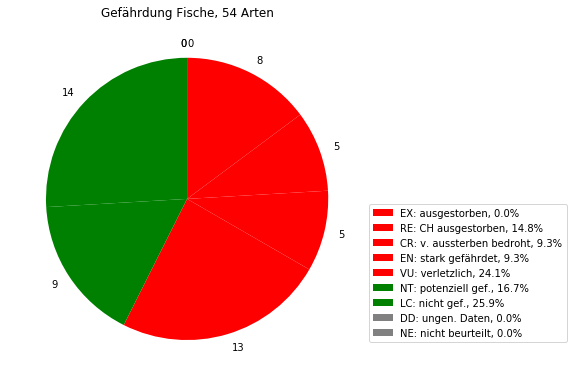

In [14]:
values = [0, 8, 5, 5, 13, 9, 14, 0, 0]
colors = ['r', 'r', 'r', 'r', 'r', 'g', "g", "grey", "grey"]
labels = [
    'EX: ausgestorben', 'RE: CH ausgestorben',
    'CR: v. aussterben bedroht', 'EN: stark gefährdet', 
    'VU: verletzlich',"NT: potenziell gef.",
    "LC: nicht gef.","DD: ungen. Daten","NE: nicht beurteilt"]


fig1, ax1 = plt.subplots(figsize=(7, 6))
fig1.subplots_adjust(0.3,0,1,1)
plt.pie(values, colors=colors, labels= values, counterclock=False,startangle=90)
plt.title('Gefährdung Fische, 54 Arten')

total = sum(values)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, values)],
    
    bbox_to_anchor=(1.0, 0.5),
    bbox_transform=fig1.transFigure
)
plt.show()